<a href="https://colab.research.google.com/github/magn2998/XraySegmentation/blob/main/Project28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Some Requriements:
! pip install gdown torch torchvision matplotlib
! pip install imutils
import os
import gdown
import useModelBatch
import useModel
import plotExperiment
import useModelSegments
import useModelSegmentsBatch

use_cpu = False # Write False if the GPU should be used

# **Project 28: Segmentation of X-ray images**

In this notebook, we will briefly cover the scripts used throughout the project in order to get the results shown in the paper on this project. We will show examples of how the results were generated, how the plots were made, and so on. The notebook will include python functions defined in external files that are also within the same Git repository as this Jupyter file. The experiments will not be covered detailed, as they are covered in the related paper.

## **Experiment 1**
For the first experiment, we simply trained the model on the entire dataset, with varying sizes of images. 
We will begin by downloading the model trained on 128x128 pixel images. The pre-trained models were too large to store in Git, so instead, they are stored in goodle drive (Size is about 124MB). A list of all models can be found listed at the bottom of this notebook. Download the model trained on 128x128 pixel images by running the code below:


In [ ]:

def download_model(id, destination_folder, filename):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    destination_path = os.path.join(destination_folder, filename)
    gdown.download(id=id, output=destination_path, quiet=False)
    print(f"Downloaded model saved to {destination_path}")

model_id = '1EotaxK6m8jHnJw0V5I6y0ZMC-O2uFzSk' # Model Id => Google Drive Document Id
download_model(model_id, 'models', 'model_trained_128x128.pt')

Next, we will simply try to run this model on a batch of 5 from the validation set. It will always use the same batch. We choose to do this, as it would be easier to compare different results.
The image below is the same seen in the paper, in figure 5. Note that the accuracy and loss is also stated. This was also how the different values for accuracy and loss was determed, which is used in the later graphs.

Testing model: models/model_trained_128x128.pt on image size 128
Device Used: cuda:0
val: cce: 0.022004, dice: 0.017063, loss: 0.019534, pixelAcc: 0.957963


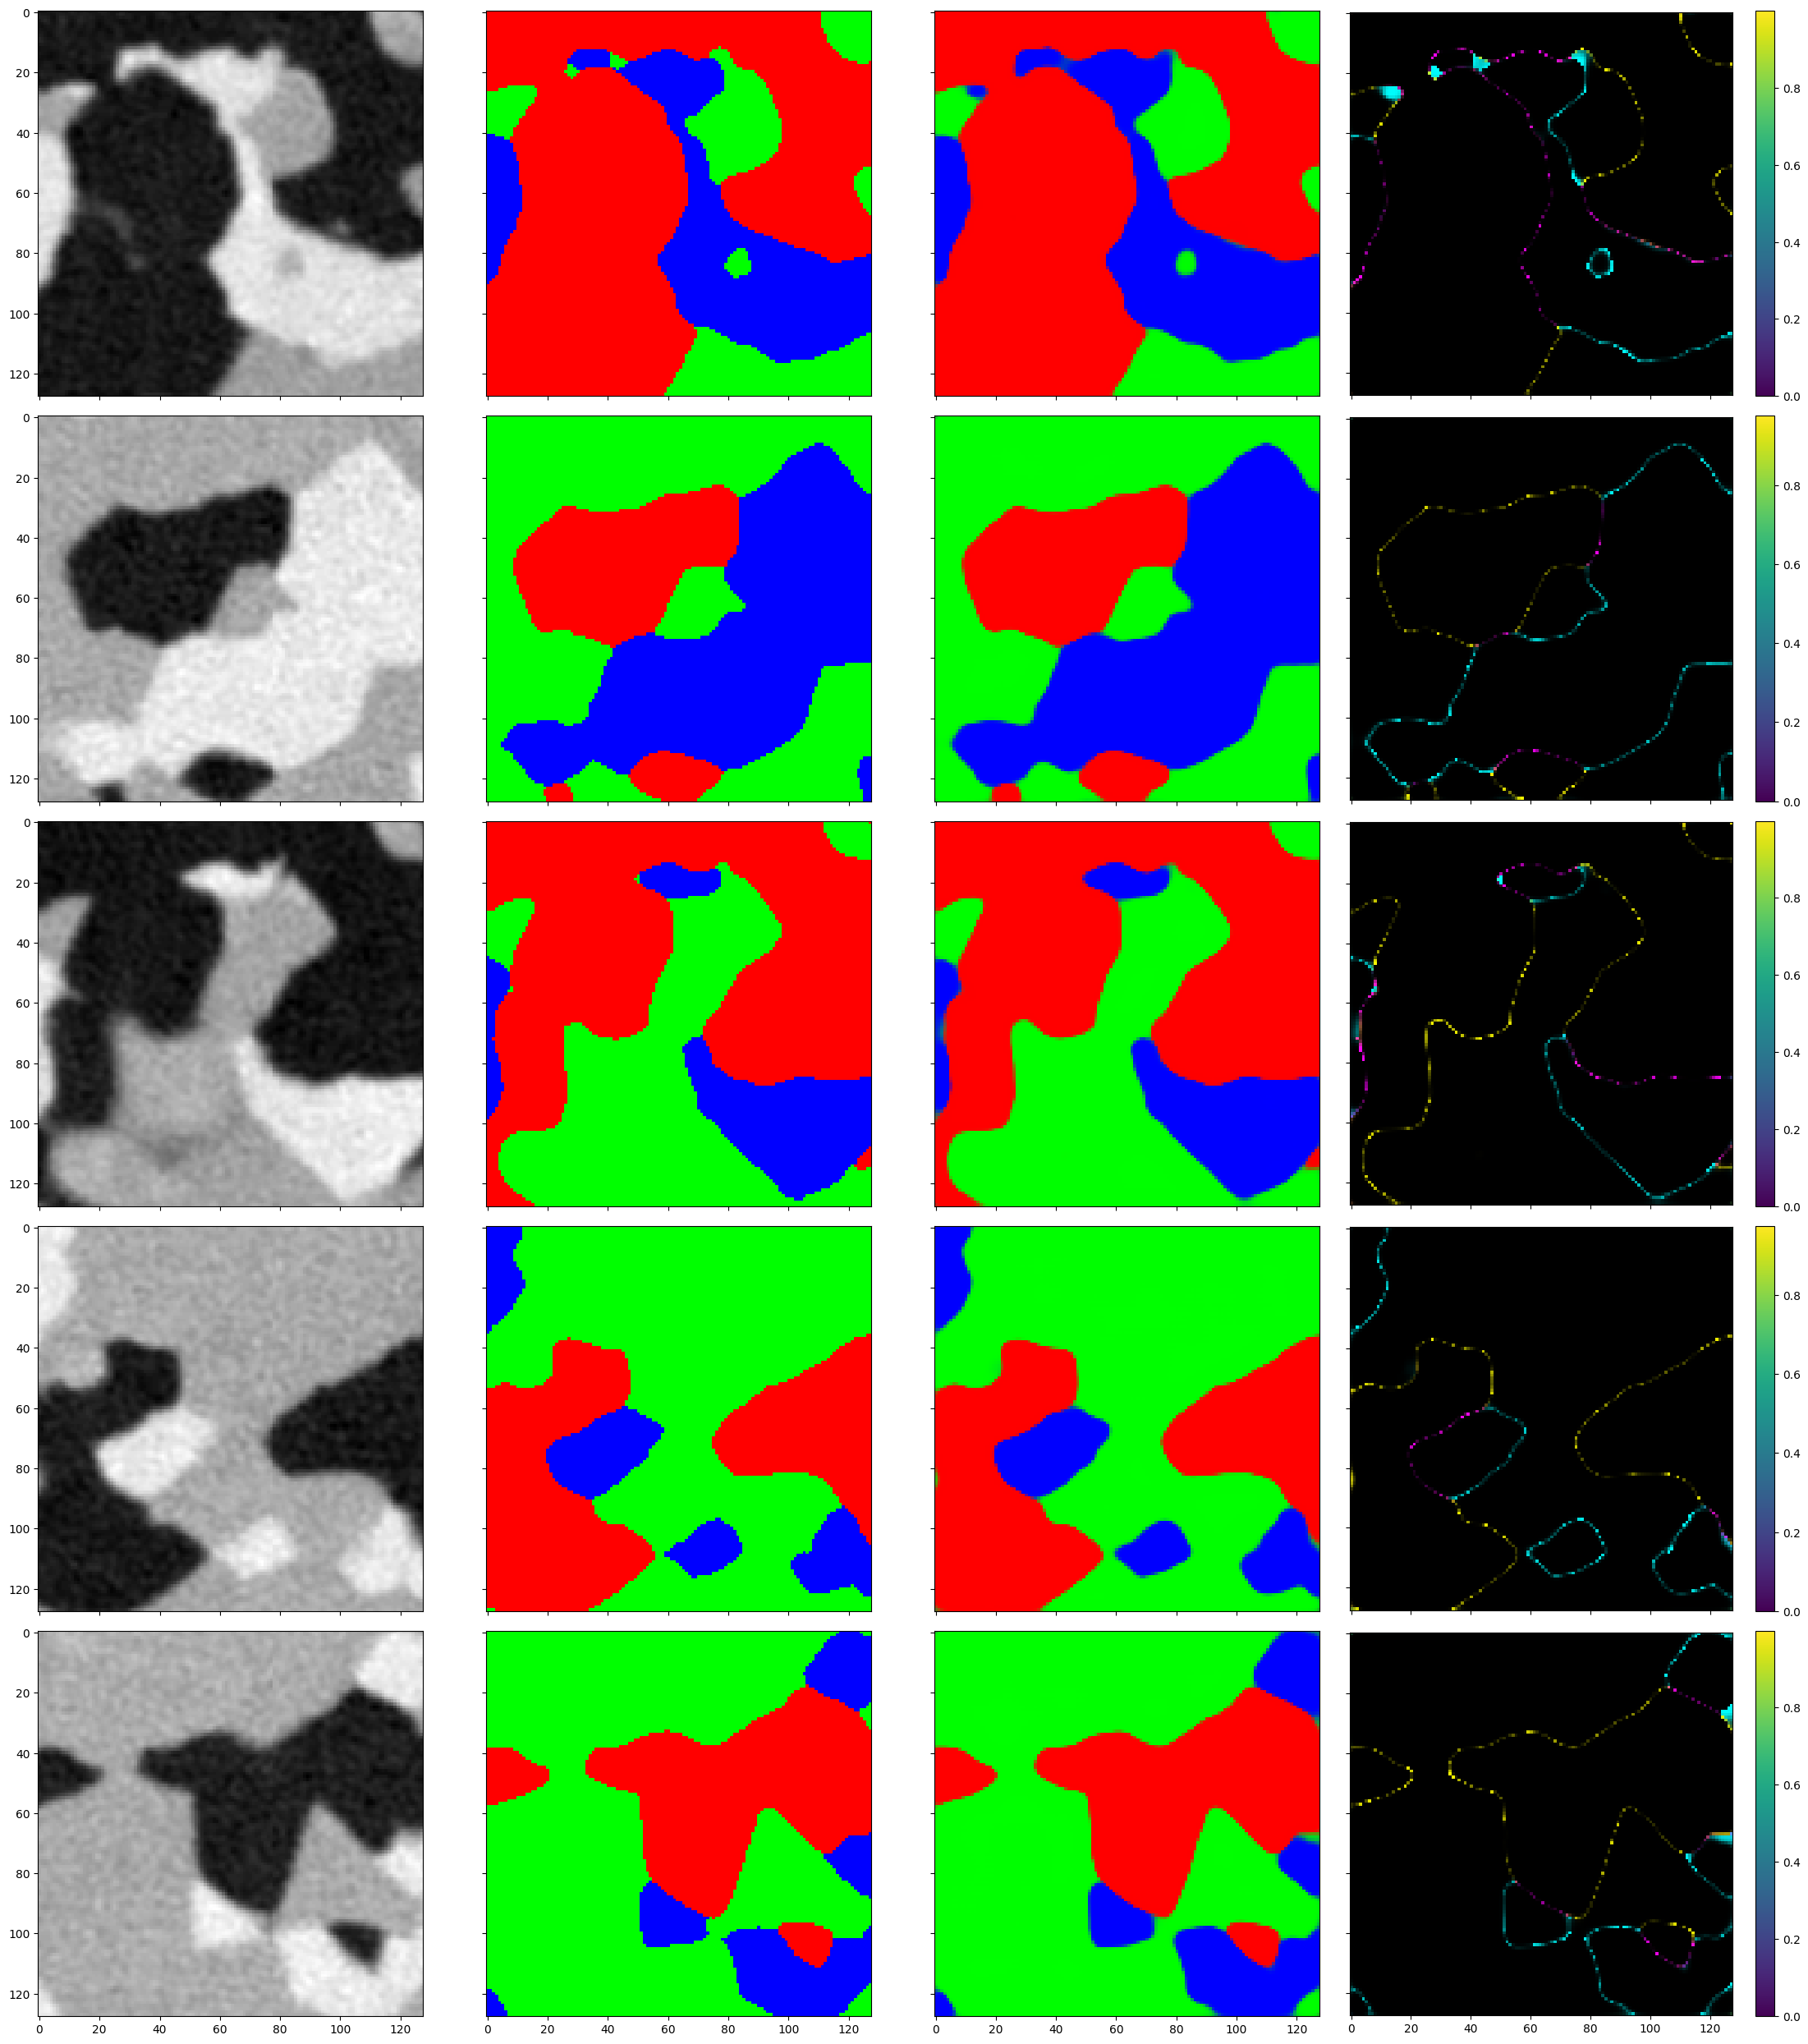

In [12]:
useModelBatch.Use_Model_On_Batch_Of_Validation_Set(128, "models/model_trained_128x128.pt", False, use_cpu)

If you want to use the model on a specific image (Image between 1-500) and see the result do:

Device Used: cuda:0
torch.Size([1, 1, 128, 128])
(1, 3, 128, 128)
val: 


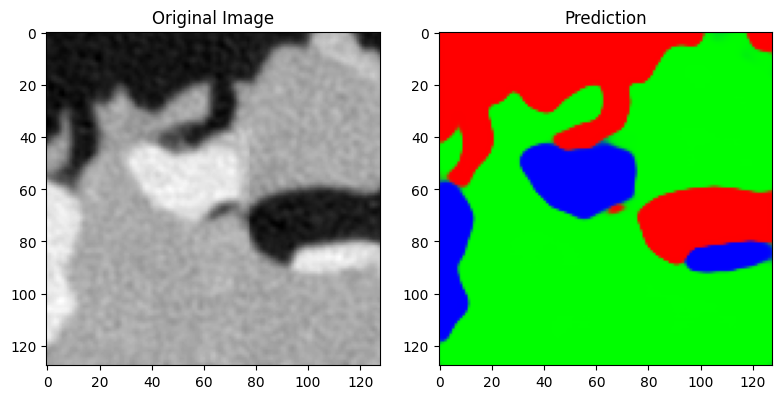

In [13]:
useModel.Use_Model_On_Specific_Image("420", 128, "models/model_trained_128x128.pt", False, use_cpu)

### **Predicting segmentation of image using several smaller images**
In experiment 3, entire images were segmented by analysing several parts of smaller images. 

This can be done by running either the _useModelSegments.py_ script or _useModelSegmentsBatch_ script. The former performs segmentation on a single image, while the latter performs segmentation on a batch of 5 images. See the code below for an example on how to use it.

Testing model: models/model_trained_128x128.pt on full image w. section size 128
Device Used: cuda:0
Analysing next picture!
Analysing next picture!
Analysing next picture!
Analysing next picture!
Analysing next picture!
val: cce: 0.026792, dice: 0.014466, loss: 0.020629, pixelAcc: 0.957834


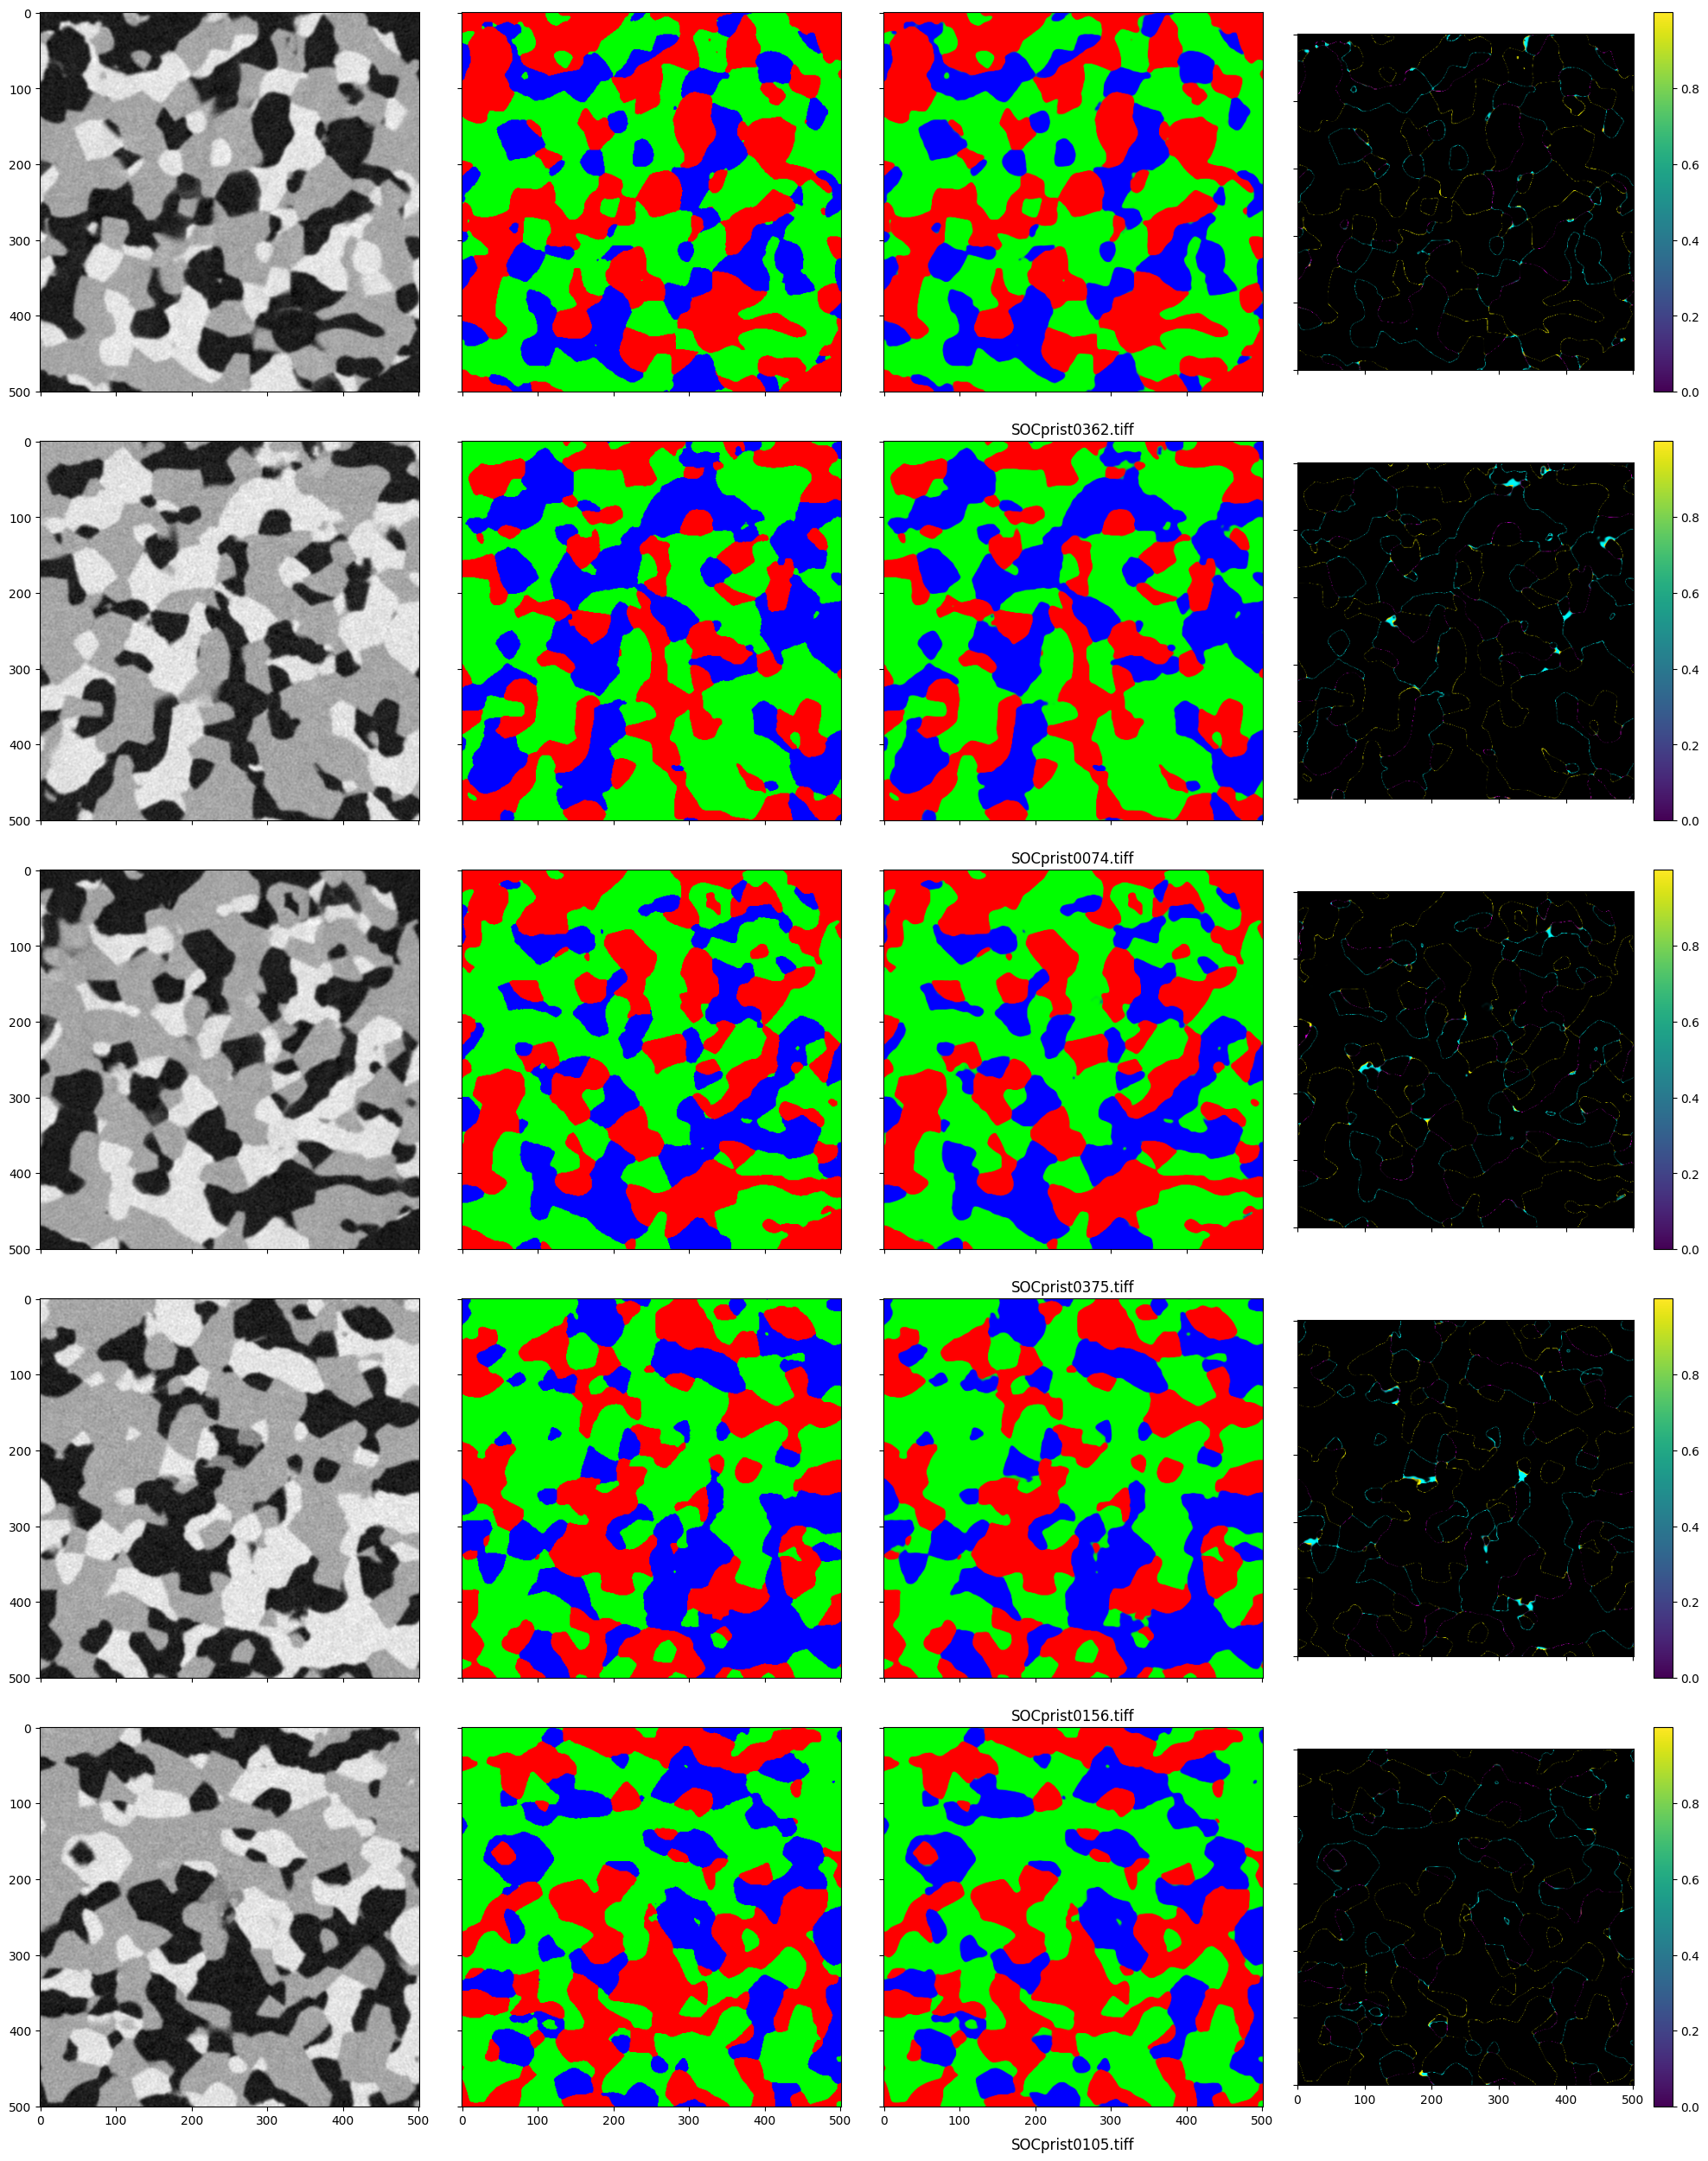

In [14]:
#useModelSegments.Use_Model_On_Specific_Image_Using_Sections("420", 128, "models/model_trained_128x128.pt", False, use_cpu)
useModelSegmentsBatch.Use_Model_On_Batch_Of_Validation_Set(128, "models/model_trained_128x128.pt", False, use_cpu)

## **Creating Graphs**
In experiment 1, 2 and 3, graphs were used to that were created in python.
The code to create these plots exists in __plotExperiment.py__, which will be used here.
The script needs the data to plot, which should be given manually. 

## **Experiment 1**
The data for experiment 1 can be found in the text file ./result/Part1/overallResults/output.txt
As an example, we will plot the validation accuracies below.
To recreate the data seen in figure 4(A) from the paper do, set the following values and run the function __plotExperiment.Simple_Graph_Create__.




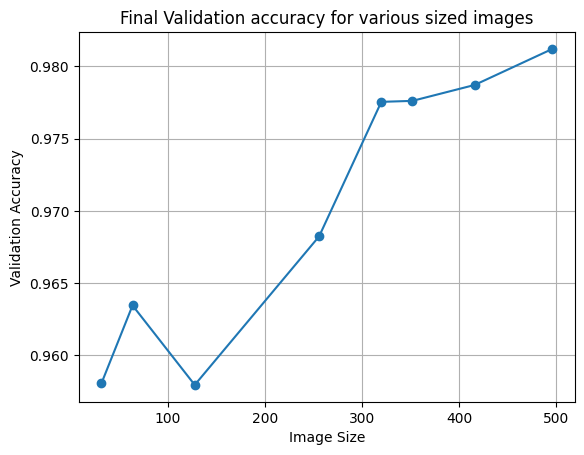

<Figure size 640x480 with 0 Axes>

In [8]:
img_size = [32, 64, 128, 256, 320, 352, 416, 496] 
accuracies = [0.958073, 0.963460, 0.957963, 0.968236, 0.977537, 0.977605, 0.978704, 0.981197] 
title = 'Final Validation accuracy for various sized images' 
x_label = 'Image Size' 
y_label = 'Validation Accuracy' 
plotExperiment.Simple_Graph_Create(img_size, accuracies, title, x_label, y_label, False)

In the same previously mentioned text file, the loss values can also be found, in order to create the figure 4(B). These values are summarized below. Run the same __plotExperiment.Simple_Graph_Create__ function call to create the image, if desired.

In [ ]:
img_size = [32, 64, 128, 256, 320, 352, 416, 496] 
losses = [0.220994, 0.096252, 0.019534, 0.016231, 0.012538, 0.012905, 0.012467, 0.011044] 
title = 'Final Validation Loss for various sized images' 
x_label = 'Image Size' 
y_label = 'Validation Loss' 
# plotExperiment.Simple_Graph_Create(img_size, losses, title, x_label, y_label, False)

## **Experiment 2**
For the first section of the second experiment  we simply plot the data present in ./results/Part2/totalOutput.txt:


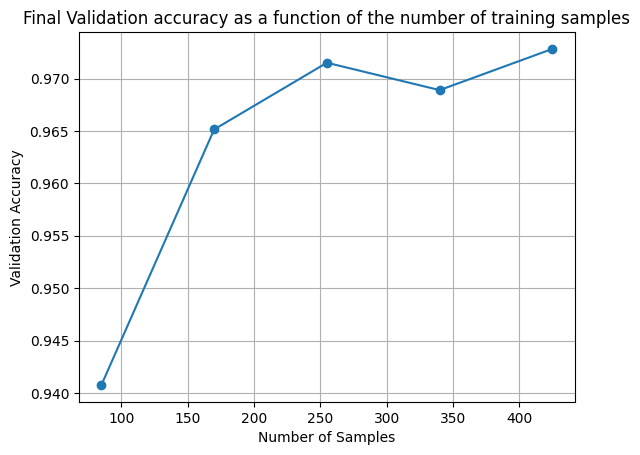

<Figure size 640x480 with 0 Axes>

In [9]:
num_samples = [85, 170, 255, 340, 425]
accuracies = [0.940763, 0.965152, 0.971517, 0.968903, 0.972835]
title = 'Final Validation accuracy as a function of the number of training samples' 
x_label = 'Number of Samples' 
y_label = 'Validation Accuracy' 
plotExperiment.Simple_Graph_Create(num_samples, accuracies, title, x_label, y_label, False)

As before we can also plot the validation loss, which can be seen in the file mentioned above.

In [ ]:
num_samples = [85, 170, 255, 340, 425]
losses = [0.024129, 0.021603, 0.017634, 0.016905, 0.013905]
title = 'Final Validation Loss as a function of the number of training samples' 
x_label = 'Number of Samples' 
y_label = 'Validation Loss' 
#plotExperiment.Simple_Graph_Create(num_samples, losses, title, x_label, y_label, False)

For experiment 2 part 2 and figure 7, we needed a scatter plot. As this was a one-case thing, we just created a single function with no arguments that creates this figure. Use __plotExperiment.Plot_Scatter_Plot__ to plot figure 7.

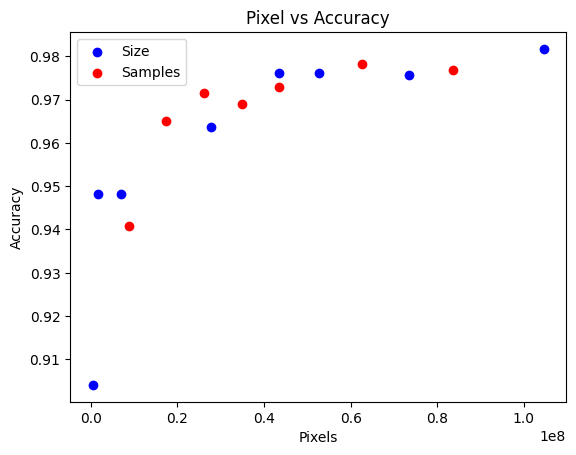

In [10]:
plotExperiment.Plot_Scatter_Plot(False) #By the way, the last boolean indicates whether or not to save the figure

## **Experiment 3**
For experiment 3, the same values can be found for the accuracy and loss using a single image as input and using multiple sections of a single image to create one total segmented image in the two following files:

results/Part3/overall_results_single/output.txt

results/Part3/overall_results_multiple/output.txt

Below, you'll find the python variables needed to create Figure 8(A) and 8(B). The values are read from the same files as above.

There are also lots of other results in the results folder. Feel free to take a look!

In [11]:
#Figure 8(A)
img_size = [32, 64, 128, 256, 320, 352, 416, 496] 
losses = [0.957786, 0.958651, 0.957724, 0.968612, 0.977927, 0.978722, 0.979273, 0.981197] 
title = 'Accuracy of models on large images when trained on smaller images' 
x_label = 'Image size used to train model' 
y_label = 'Accuracy'
#plotExperiment.Simple_Graph_Create(img_size, losses, title, x_label, y_label, False)

#Figure 8(B)
img_size = [32, 64, 128, 256, 320, 352, 416, 496] 
losses = [0.955880, 0.958846, 0.957834, 0.968581, 0.977910, 0.978613, 0.979240, 0.981272] 
title = 'Accuracy of models on large images when trained on smaller images' 
x_label = 'Image size used to train model' 
y_label = 'Accuracy'
#plotExperiment.Simple_Graph_Create(img_size, losses, title, x_label, y_label, False)

# **Training**
All the training was done in the train.py file.
We don't go into detail into how it works, but it consists of a lot of functions to load data, perform cropping augmentations and calculate loss.
It will also automatically use any available CUDA device, if any are present. Otherwise it will use the CPU.

State the different constant used to setup the training loop below.

IMAGE HEIGHT: 32
IMAGE WIDTH: 32
MAX EPOCHS: 10
NUM SAMPLES: -1
Device Used: cuda:0
Epoch 1/10
----------
LR 0.0001
train: cce: 0.986045, dice: 0.723479, loss: 0.854762, pixelAcc: 0.005478
val: cce: 0.652395, dice: 0.572279, loss: 0.612337, pixelAcc: 0.245890
saving best model
0m 31s
Epoch 2/10
----------
LR 0.0001
train: cce: 0.316169, dice: 0.452380, loss: 0.384275, pixelAcc: 0.421670
val: cce: 0.308110, dice: 0.468685, loss: 0.388398, pixelAcc: 0.535699
saving best model
0m 4s
Epoch 3/10
----------
LR 0.0001
train: cce: 0.221827, dice: 0.397390, loss: 0.309608, pixelAcc: 0.583150
val: cce: 0.169119, dice: 0.374785, loss: 0.271952, pixelAcc: 0.634627
saving best model
0m 4s
Epoch 4/10
----------
LR 0.0001
train: cce: 0.159009, dice: 0.367584, loss: 0.263296, pixelAcc: 0.704827
val: cce: 0.152621, dice: 0.342776, loss: 0.247698, pixelAcc: 0.720022
saving best model
0m 4s
Epoch 5/10
----------
LR 0.0001
train: cce: 0.139980, dice: 0.365970, loss: 0.252975, pixelAcc: 0.738313
val: cce: 

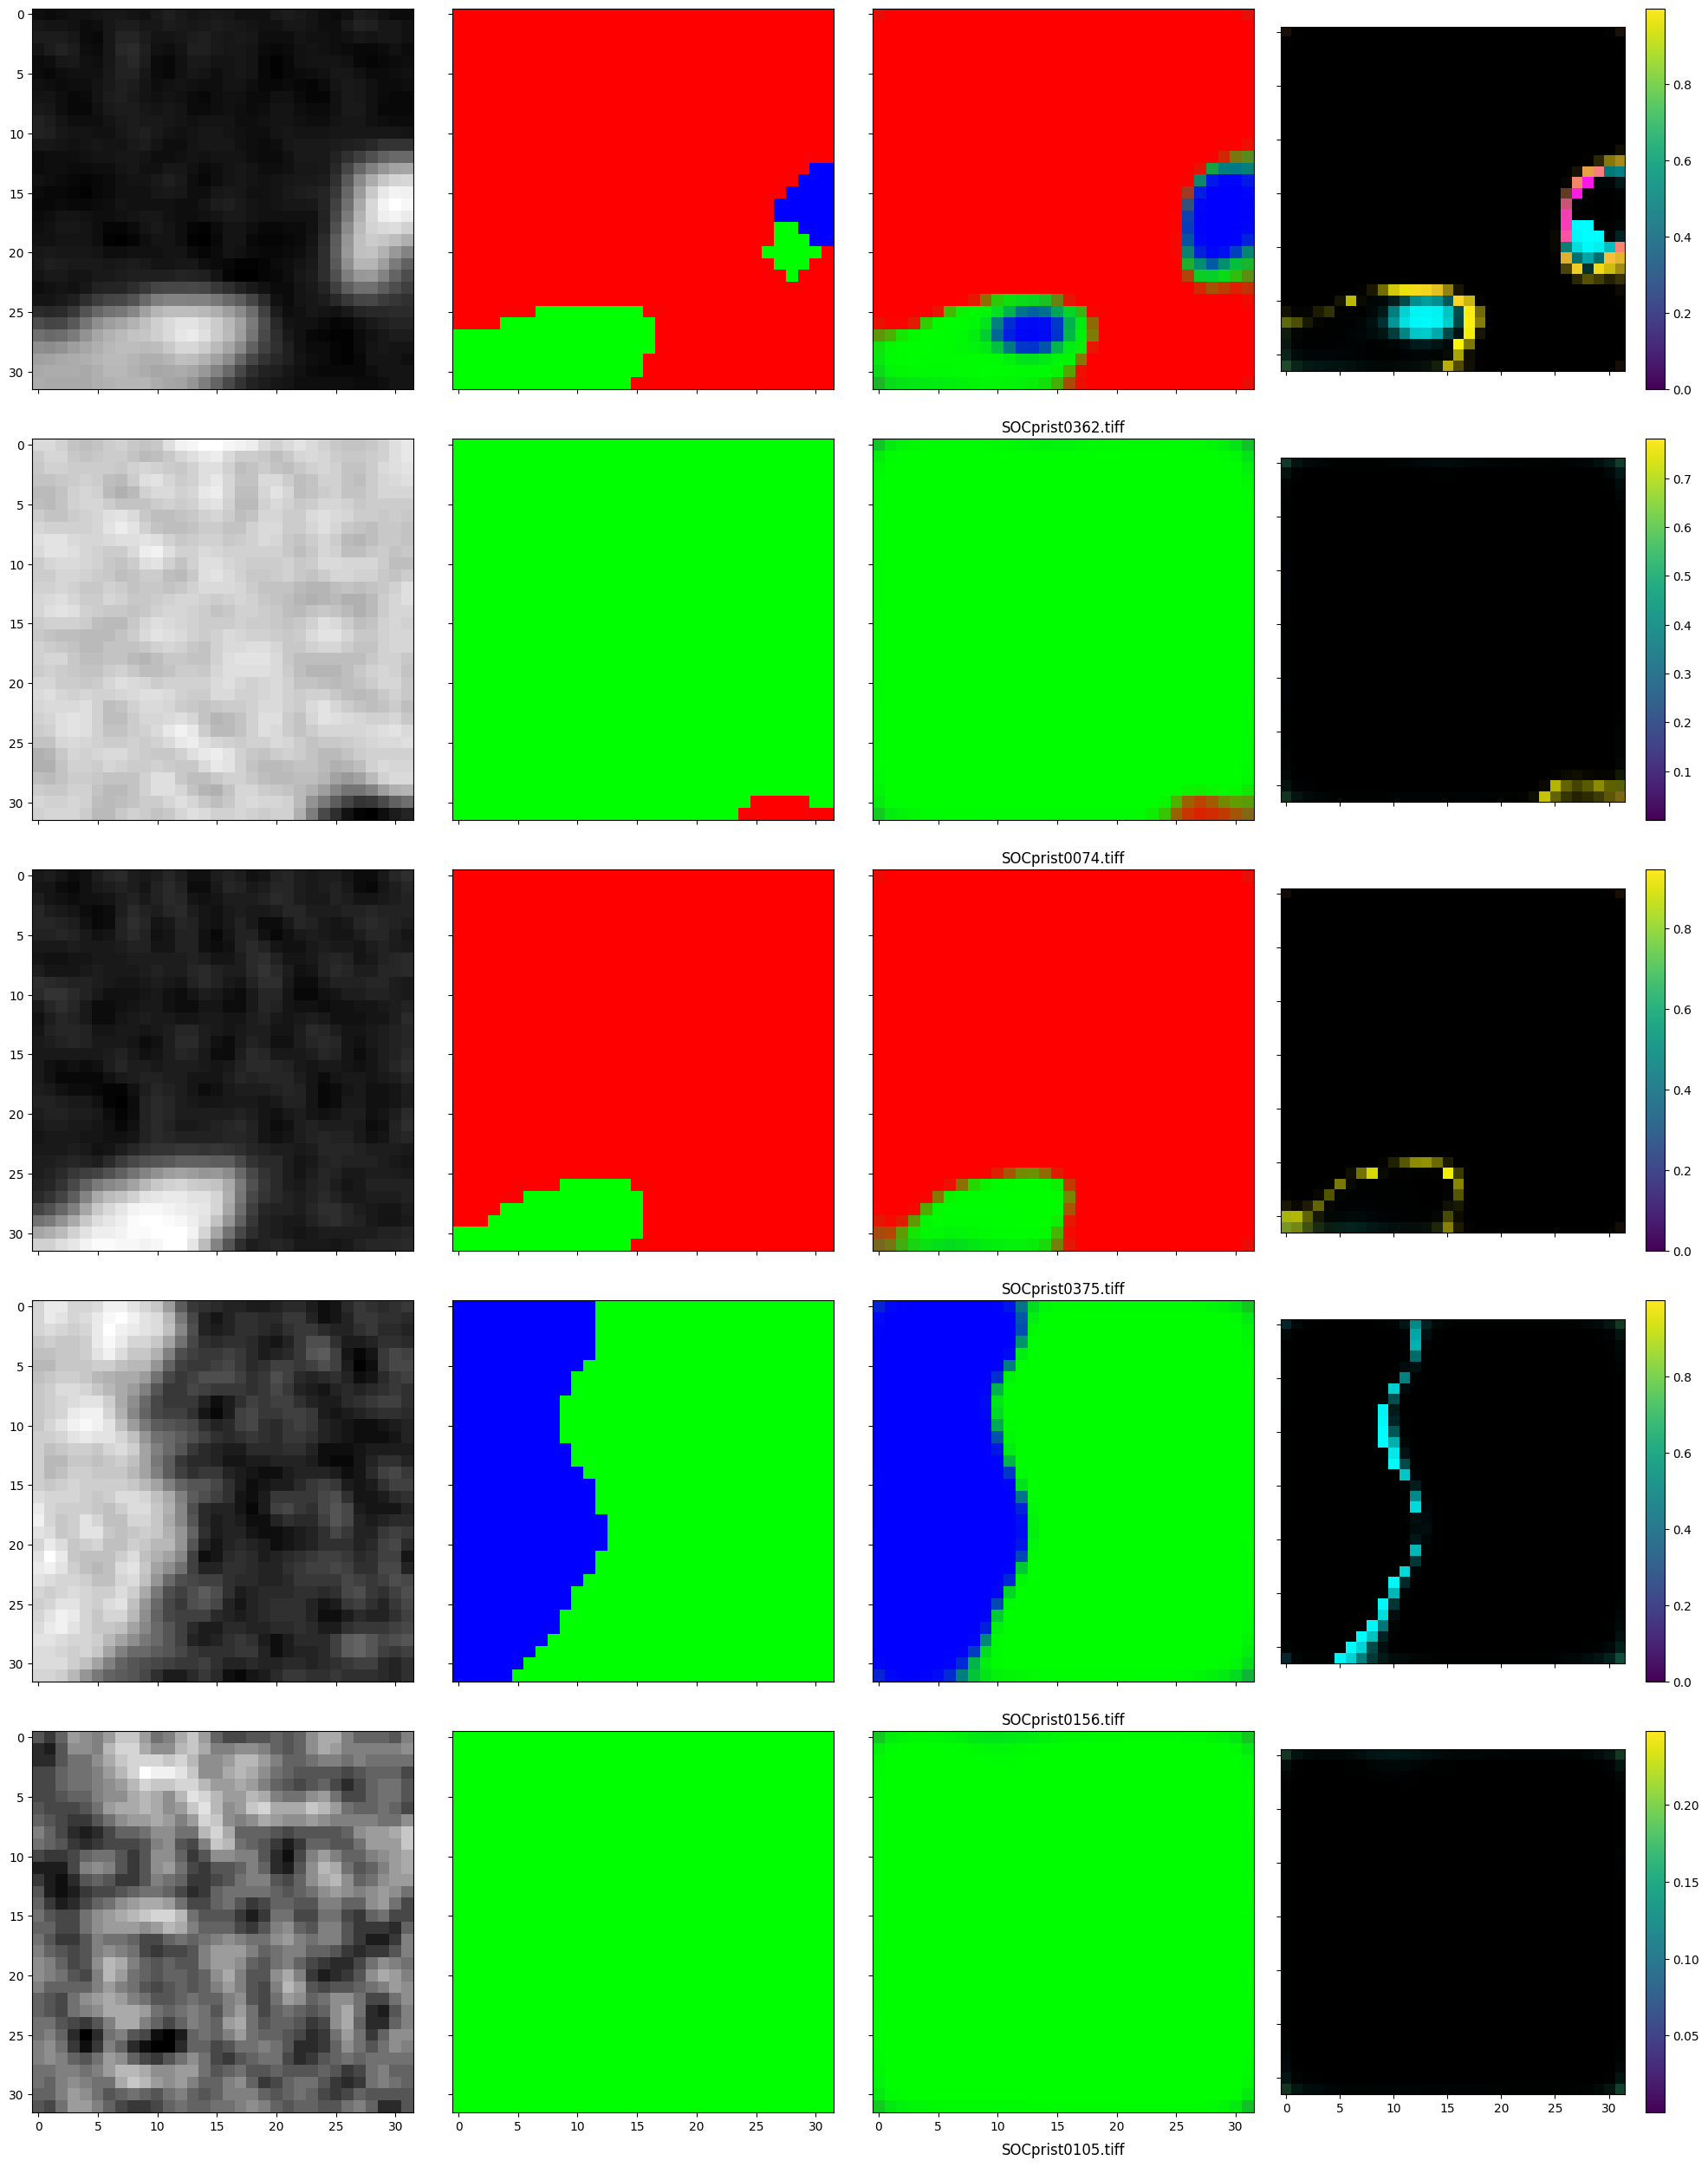

In [15]:
import Unet
import train

train.batch_size = 5
train.IMG_HEIGHT = 32
train.IMG_WIDTH = 32
train.EPOCHS = 10

train.run(Unet.UNet)

### **List of all pre-trained models**
Below is a list of all the pre-trained models and their Google Drive IDs.

Insert their ID's in the script that downloads models to use them. Remember to update the image sizes accordingly whereever relevant.

32x32 pixels:   1N8V_3cbYluWAb9jZ1z6WGHLdnLCkA8HE

64x64 pixels:   1s0oZ3PvmvsGm9ccf-dA8XQotGW78S9Q8

128x128 pixels: 1EotaxK6m8jHnJw0V5I6y0ZMC-O2uFzSk

256x256 pixels: 1odmg62ZD5nboAHpyXfQL61dsDwe2Ajye

320x320 pixels: 1OaTvGhxX5yGALwpbYrQM7fuM-u4c6_21

352x352 pixels: 1WQJuqdVJKm9bKKYbsNEUaYRF3ZLzFR87

416x416 pixels: 1UbNEofJnG_mByLf9wdypH5vdeWROL2s5

496x496 pixels: 1WkD6sfzuiGgMI8LJGBI7LIWZ5pKZ88io


